TITANIC


In [ ]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(df.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [ ]:
categories = ["sex","embarked","class","who","deck","embark_town","alive","alone"]
for col in categories:
    unique_values = df[col].unique()
    print(f"{col}: {list(unique_values)}")

sex: ['male', 'female']
embarked: ['S', 'C', 'Q', nan]
class: ['Third', 'First', 'Second']
who: ['man', 'woman', 'child']
deck: [nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
embark_town: ['Southampton', 'Cherbourg', 'Queenstown', nan]
alive: ['no', 'yes']
alone: [False, True]


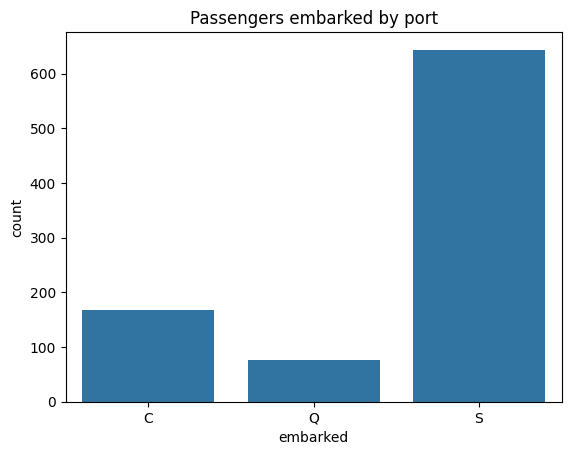

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="embarked", data=df)
plt.title("Passengers embarked by port")
plt.show()

Text(0.5, 1.0, 'Passengers by class')

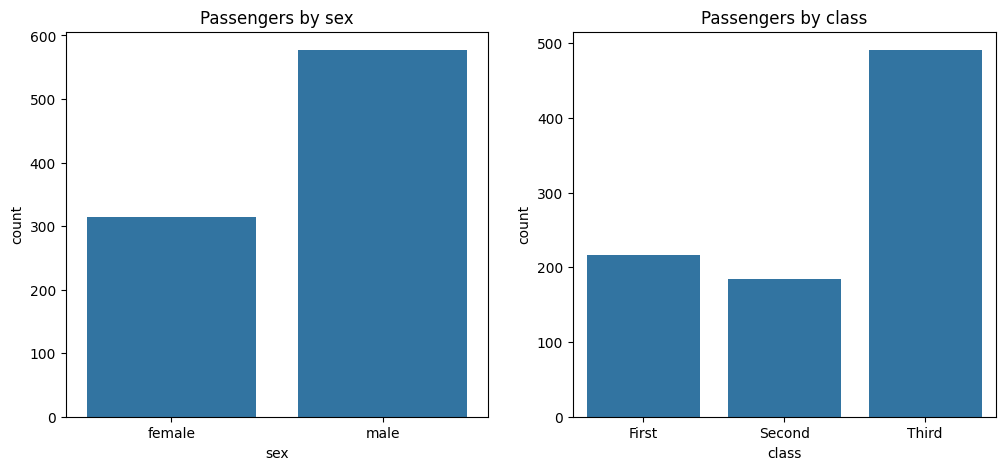

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.countplot(x="sex", data=df, ax=axes[0])
axes[0].set_title("Passengers by sex")

sns.countplot(x="class", data=df, order=["First","Second","Third"])
axes[1].set_title("Passengers by class")

In [ ]:
df = sns.load_dataset("titanic")
train = pd.read_csv("/content/drive/MyDrive/PJATK/scikit/titanic.csv")

train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df["name"] = train["name"]
df["ticket"] = train["ticket"]


num_features = ["age","fare"]
nom_features = ["embarked","who"]
ord_features = ["class"]
bin_features = ["alive","sex","adult_male","alone"]

In [ ]:
#imputation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

imputer = SimpleImputer(strategy="mean")
df[num_features] = imputer.fit_transform(df[num_features])

In [ ]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_nom = encoder.fit_transform(df[nom_features])
encoded_nom_names = encoder.get_feature_names_out(nom_features)
df_encoded_nom = pd.DataFrame(encoded_nom, columns=encoded_nom_names)

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[["First","Second","Third"]])
df["class_encoded"] = ordinal_encoder.fit_transform(df[["class"]])

In [ ]:
df["alive"] = df["alive"].map({"yes":1,"no":0})
df["sex"] = df["sex"].map({"male":1,"female":0})
df["adult_male"] = df["adult_male"].astype(int)
df["alone"] = df["alone"].astype(int)

In [ ]:
df["has_cabin"] = df["deck"].notna().astype(int)
df["title"] = df["name"].str.extract(r"([A-Za-z]+)\.")

df.drop(columns=["class","embark_town","deck","name","ticket"], inplace=True)

In [ ]:
df_final = pd.concat([df[num_features],
                     df_encoded_nom,
                     df["class_encoded"],
                     df[bin_features],
                     df["title"],
                     df["has_cabin"]],
                    axis=1)

In [ ]:
print(df_final.head())

    age     fare  embarked_Q  embarked_S  embarked_nan  who_man  who_woman  \
0  22.0   7.2500         0.0         1.0           0.0      1.0        0.0   
1  38.0  71.2833         0.0         0.0           0.0      0.0        1.0   
2  26.0   7.9250         0.0         1.0           0.0      0.0        1.0   
3  35.0  53.1000         0.0         1.0           0.0      0.0        1.0   
4  35.0   8.0500         0.0         1.0           0.0      1.0        0.0   

   class_encoded  alive  sex  adult_male  alone   title  has_cabin  
0            2.0      0    1           1      0    Miss          0  
1            0.0      1    0           0      0  Master          1  
2            2.0      1    0           0      1    Miss          0  
3            0.0      1    0           0      0      Mr          1  
4            2.0      0    1           1      1     Mrs          0  


In [ ]:
print(df["title"].value_counts())

title
Mr          495
Miss        172
Mrs         158
Master       33
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Mme           1
Lady          1
Capt          1
Dona          1
Sir           1
Jonkheer      1
Countess      1
Don           1
Ms            1
Name: count, dtype: int64


In [ ]:
df.drop(columns=["title"], inplace=True)

WINE

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

In [ ]:
wine = fetch_openml(name="wine-quality-red",version=1,as_frame=True)
X, Y = wine.data, wine.target

X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

X_train_standardized = scaler_standard.fit_transform(X_train)
X_train_normalized = scaler_minmax.fit_transform(X_train)

In [ ]:
df_original = pd.DataFrame(X_train, columns=X.columns)
df_standardized = pd.DataFrame(X_train_standardized, columns=X.columns)
df_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)

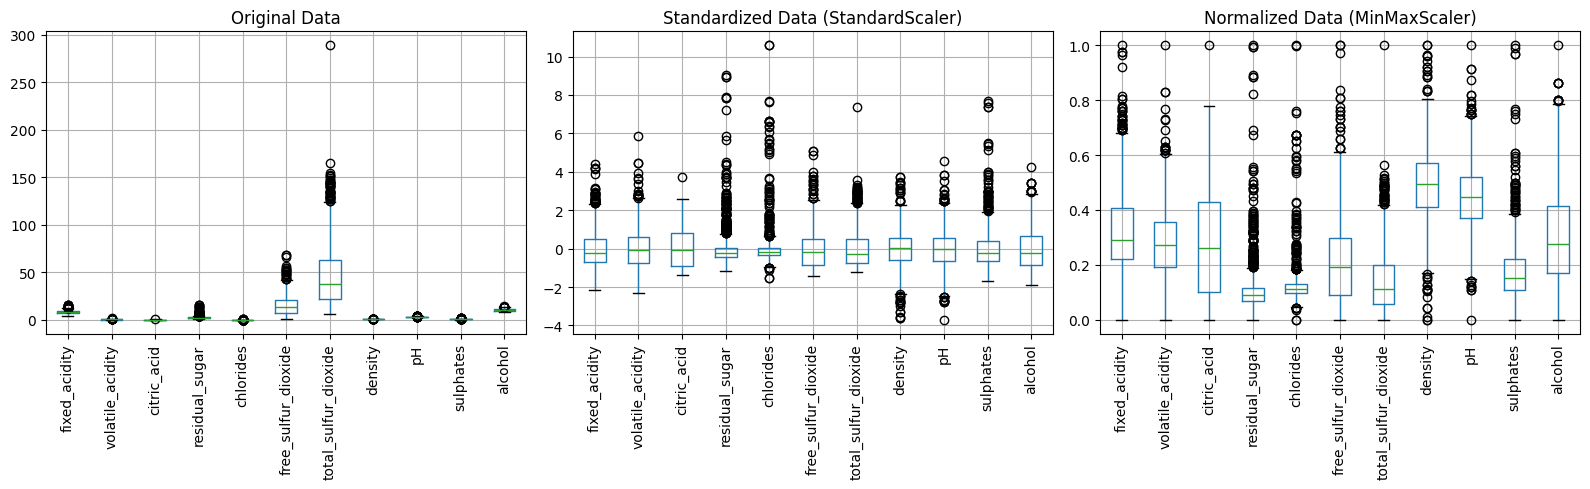

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(16,5))

df_original.boxplot(ax=axes[0], rot=90)
axes[0].set_title("Original Data")

df_standardized.boxplot(ax=axes[1], rot=90)
axes[1].set_title("Standardized Data (StandardScaler)")

df_normalized.boxplot(ax=axes[2], rot=90)
axes[2].set_title("Normalized Data (MinMaxScaler)")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from sklearn.datasets import fetch_openml

wine = fetch_openml(name="wine-quality-red", version=1, as_frame=True)
X = wine.data

column = "residual_sugar"
data = X[column]

In [ ]:
lower_quantile = data.quantile(0.05)
upper_quantile = data.quantile(0.95)
outliers_5_percent = (data < lower_quantile) | (data > upper_quantile)

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_IQR = (data < lower_bound) | (data > upper_bound)

In [ ]:
z_scores = zscore(data)
outliers_zscore = np.abs(z_scores) > 3

In [ ]:
iso = IsolationForest(contamination='auto', random_state=42)
outlier_preds = iso.fit_predict(data.values.reshape(-1, 1))
outliers_iso = outlier_preds == -1

In [ ]:
outlier_counts = pd.DataFrame({
    "Metoda": ["5% Skrajnych", "IQR", "Z-score", "Isolation Forest"],
    "Procent wartości odstających": [
        outliers_5_percent.mean() * 100,
        outliers_IQR.mean() * 100,
        outliers_zscore.mean() * 100,
        outliers_iso.mean() * 100
    ]
}).round(2)

print(outlier_counts)

             Metoda  Procent wartości odstających
0      5% Skrajnych                          9.94
1               IQR                          9.69
2           Z-score                          1.88
3  Isolation Forest                         20.01


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.datasets import fetch_openml

# Wczytanie zbioru danych Wine (czerwone wino)
wine = fetch_openml(name="wine-quality-red", version=1, as_frame=True)
X = wine.data
y = wine.target.astype(int)

# Grupowanie jakości wina na 3 kategorie
# 0: słabe, 1: średnie, 2: dobre
y = pd.cut(y, bins=[0, 4, 6, 8], labels=[0, 1, 2])
y = y.astype(int)  # Konwersja na wartości całkowite

# Podział na zbiór treningowy i testowy (przed usuwaniem outlierów)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

# Wybór kolumny z outlierami
column = "residual_sugar"

# Funkcja do oceny modelu RandomForestRegreso
def evaluate_model(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(n_estimators=500,
                                  max_depth=None,
                                  max_features='log2',
                                  random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

# Original data
original_metrics = evaluate_model(X_train, X_test, y_train, y_test)


# Deleting 5%
lower_quantile = X_train[column].quantile(0.05)
upper_quantile = X_train[column].quantile(0.95)
X_train_filtered = X_train[(X_train[column] >= lower_quantile) & \
                            (X_train[column] <= upper_quantile)]
y_train_filtered = y_train[X_train_filtered.index]
filtered_metrics = evaluate_model(X_train_filtered, X_test,
                                  y_train_filtered, y_test)

# IQR
Q1 = X_train[column].quantile(0.25)
Q3 = X_train[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
X_train_iqr = X_train[(X_train[column] >= lower_bound) & \
                      (X_train[column] <= upper_bound)]
y_train_iqr = y_train[X_train_iqr.index]
iqr_metrics = evaluate_model(X_train_iqr, X_test,
                             y_train_iqr, y_test)

# Z-score
z_scores = zscore(X_train[column])
X_train_zscore = X_train[np.abs(z_scores) <= 3]
y_train_zscore = y_train[X_train_zscore.index]
zscore_metrics = evaluate_model(X_train_zscore, X_test,
                                y_train_zscore, y_test)

# Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = iso.fit_predict(X_train[[column]])
X_train_iso = X_train[outlier_preds != -1]
y_train_iso = y_train[X_train_iso.index]
iso_metrics = evaluate_model(X_train_iso, X_test,
                             y_train_iso, y_test)

# Winsorization
X_train_winsorized = X_train.copy()
X_train_winsorized[column] = winsorize(X_train_winsorized[column],
                                       limits=[0.05, 0.05])
winsorized_metrics = evaluate_model(X_train_winsorized, X_test,
                                    y_train, y_test)

# Table to compare
metrics_df = pd.DataFrame({
    "Metoda": ["Oryginalne dane", "5% Skrajnych",
               "IQR", "Z-score",
               "Isolation Forest", "Winsoryzacja"],
    "MAE": [original_metrics["MAE"], filtered_metrics["MAE"],
            iqr_metrics["MAE"], zscore_metrics["MAE"],
            iso_metrics["MAE"], winsorized_metrics["MAE"]],
    "MSE": [original_metrics["MSE"], filtered_metrics["MSE"],
            iqr_metrics["MSE"], zscore_metrics["MSE"],
            iso_metrics["MSE"], winsorized_metrics["MSE"]],
    "R2": [original_metrics["R2"], filtered_metrics["R2"],
           iqr_metrics["R2"], zscore_metrics["R2"],
           iso_metrics["R2"], winsorized_metrics["R2"]]
})

print(metrics_df)

             Metoda       MAE       MSE        R2
0   Oryginalne dane  0.174725  0.089045  0.471835
1      5% Skrajnych  0.183069  0.096276  0.428950
2               IQR  0.185156  0.095148  0.435637
3           Z-score  0.178638  0.091536  0.457061
4  Isolation Forest  0.184031  0.096339  0.428572
5      Winsoryzacja  0.174344  0.088495  0.475102
